In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
df = pd.read_csv("df_weekly_pm.csv")
df = df.set_index('Date')
df_train, df_test = df[:"2020-01-01"], df["2020-01-01":]

In [3]:
df

,PM2.5
Date,
2015-01-04,184.605000
2015-01-11,196.005714
2015-01-18,187.650000
2015-01-25,156.357143
2015-02-01,162.784286
...,...
2020-06-07,46.195714
2020-06-14,58.957143
2020-06-21,41.858571


C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


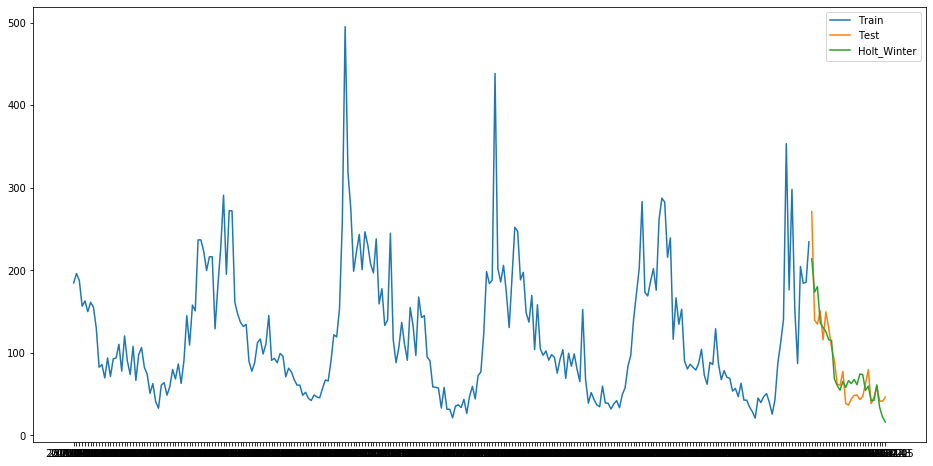

In [4]:
train = df_train
test = df_test
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['PM2.5']) ,seasonal_periods=52 ,trend='add', seasonal='add',).fit(optimized=True)
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['PM2.5'], label='Train')
plt.plot(test['PM2.5'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.savefig('images/pm-holtw-forecast.png')
plt.show()

AttributeError: 'HoltWintersResults' object has no attribute 'plot_predict'

In [15]:
fit1.summary()

Dep. Variable:,endog,No. Observations:,261
Model:,ExponentialSmoothing,SSE,395123.053
Optimized:,True,AIC,2023.155
Trend:,Additive,BIC,2222.768
Seasonal:,Additive,AICC,2057.036
Seasonal Periods:,52,Date:,"Thu, 19 Nov 2020"
Box-Cox:,False,Time:,19:45:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0526316,alpha,True
smoothing_slope,0.0526316,beta,True


In [16]:
predictions = y_hat_avg['Holt_Winter']
test = y_hat_avg["PM2.5"]
evaluation_results = pd.DataFrame({'r2_score': r2_score(test, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test, predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test, predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test)/np.abs(test))*100 

In [17]:
evaluation_results

,r2_score,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.812268,18.795665,22.860157,27.737165
